# paper: FRB 220411aabk (false burst)

In [1]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
import numpy as np

%matplotlib inline 

importing Jupyter notebook from BurstFit_paper_template.ipynb


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


In [2]:
# input variables 
candidate = '220411aabk'
datestring = '2022_4_10_22_26_15'
beam = 117
corr = 'corr02'
snr_heimdall = 9.5
dm_heimdall = 151.3
width_heimdall = 32 

voltage = True
dedisperse = False 
fil_file = '/home/ubuntu/vikram/scratch/' + candidate + '.fil'
mask_chans=[] 
nfreq = 4 
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))

2022-06-09 20:59:40,647 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-09 20:59:40,832 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-09 20:59:40,834 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-09 20:59:40,884 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (35.909177820267686, 20.993914845907792)


using filterbank  /data/dsa110/T1/corr02/2022_4_10_22_26_15/fil_220411aabk/220411aabk_117.fil


2022-06-09 20:59:40,903 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-09 20:59:42,344 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-09 20:59:42,347 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-09 20:59:42,349 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


using filterbank  /home/ubuntu/vikram/scratch/220411aabk.fil
/home/ubuntu/vikram/scratch/220411aabk.fil 3.2768e-05 0.000262144


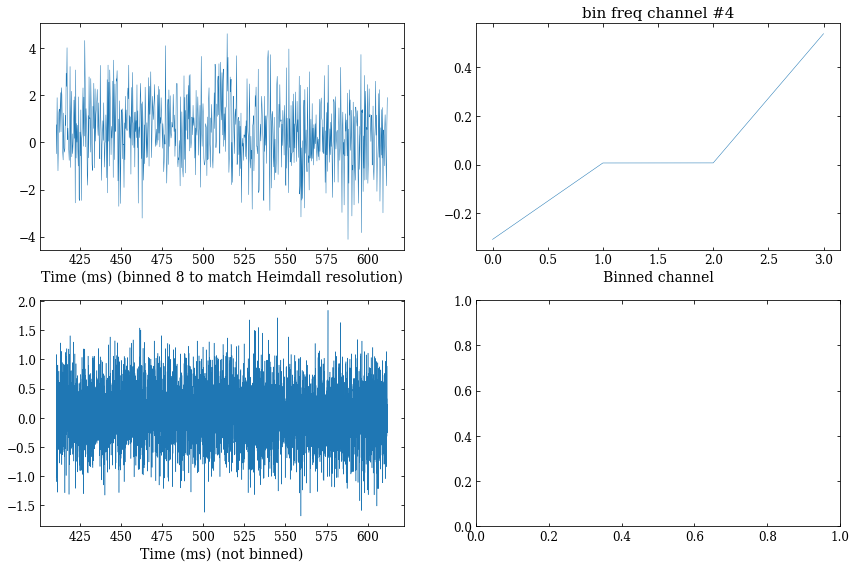

In [3]:
bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=False)

bd, fil_file  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=True)


print(fil_file, bd.tsamp, bd_heimdall.tsamp)
data_burst = paper_fit.prepare_burst_data(fil_file, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = voltage,
                                t_chop_center_s=0.5, t_chop_width = 3 * width_heimdall, 
                               dedisperse=dedisperse, nfreq = nfreq)

## S1: Spectrum--  4 channels, normalized
## T1: Time profile-- Gaussian 
## T2: Time profile-- Gaussian + scattering
## cx: x-components in time profile 

### No scattering

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-09 20:59:43,053 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 20:59:43,055 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 20:59:43,059 - tests -root - INFO - P values: T-test (0.65622), Kruskal (0.79380), KS (0.77281), F-test (0.78315)
2022-06-09 20:59:43,060 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-09 20:59:43,063 - tests -root - INFO - P values: T-test (0.02551), Kruskal (0.03020), KS (0.04676), F-test (0.96424)
2022-06-09 20:59:43,065 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-09 20:59:43,068 - tests -root - INFO - P values: T-test (0.00577), Kruskal (0.01037), KS (0.07482), F-test (0.84630)
2022-06-09 20:59:43,070 - run_tests -burstfit.fit - INFO - On pulse residual is similar to right off pulse region.
2022-06-09 20:59:43,071 - fitall -burstfit.fit - WARNING - On pulse region looks like noise. Check candidate parameters


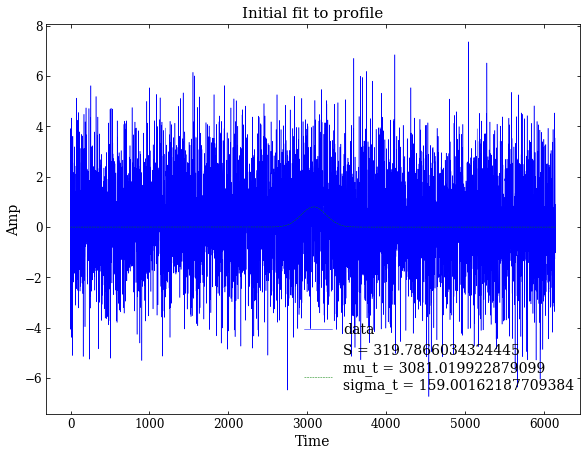

2022-06-09 20:59:43,466 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 20:59:43,467 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f5634e5c1e0>
[-0.655291    0.14766136  0.37670702  1.6065543 ]


2022-06-09 20:59:43,470 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 20:59:43,471 - initial_spectrafit -burstfit.fit - INFO - c0: -0.6552910208702087 +- 0.0
2022-06-09 20:59:43,472 - initial_spectrafit -burstfit.fit - INFO - c1: 0.14766135811805725 +- 0.0
2022-06-09 20:59:43,473 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3767070174217224 +- 0.0


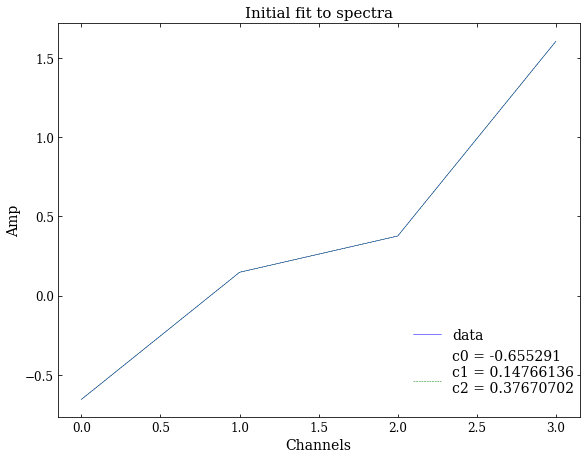

2022-06-09 20:59:43,623 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-09 20:59:43,625 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [-0.655291, 0.14766136, 0.37670702, 319.7866034324445, 3081.019922879099, 159.00162187709384, 151.3]
2022-06-09 20:59:44,072 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 20:59:44,074 - sgram_fit -burstfit.fit - INFO - c0: -18.748097525370525 +- 0.6922966342974849
2022-06-09 20:59:44,076 - sgram_fit -burstfit.fit - INFO - c1: -2.1370466619142188 +- 0.5350678524844953
2022-06-09 20:59:44,079 - sgram_fit -burstfit.fit - INFO - c2: -2.1155497592337187 +- 0.5350574400648683
2022-06-09 20:59:44,082 - sgram_fit -burstfit.fit - INFO - S: 168.67711431049833 +- 1.5422309753034311
2022-06-09 20:59:44,084 - sgram_fit -burstfit.fit - INFO - mu_t: 2760.207477901015 +- 42.43345311914517
2022-06-09 20:59:44,086 - sgram_fit -burstfit.fit - INFO - sigma_t: 3393.1810556472706 +- 33.97619

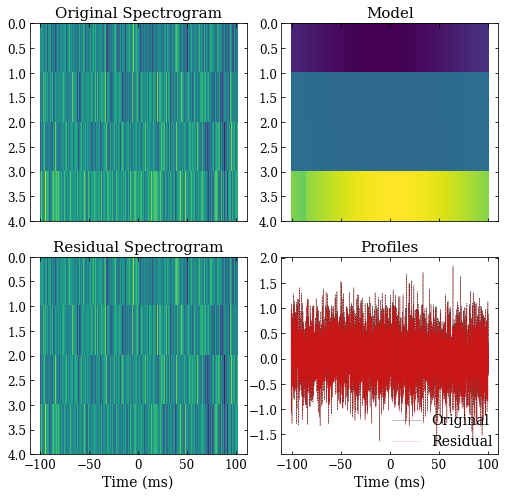

2022-06-09 20:59:44,689 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:44,690 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 20:59:44,693 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 20:59:44,695 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
2022-06-09 20:59:44,712 - model -burstfit.fit - INFO - Makin

{bf}.calc_redchisq()= --


In [4]:
bf_S1T1_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 2000, 0),(np.inf, 4000, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-09 20:59:44,754 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 20:59:44,756 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 20:59:44,760 - tests -root - INFO - P values: T-test (0.65622), Kruskal (0.79380), KS (0.77281), F-test (0.78315)
2022-06-09 20:59:44,762 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-09 20:59:44,766 - tests -root - INFO - P values: T-test (0.02551), Kruskal (0.03020), KS (0.04676), F-test (0.96424)
2022-06-09 20:59:44,767 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-09 20:59:44,771 - tests -root - INFO - P values: T-test (0.00577), Kruskal (0.01037), KS (0.07482), F-test (0.84630)
2022-06-09 20:59:44,773 - run_tests -burstfit.fit - INFO - On pulse residual is similar to right off pulse region.
2022-06-09 20:59:44,774 - fitall -burstfit.fit - WARNING - On pulse region looks like noise. Check candidate parameters


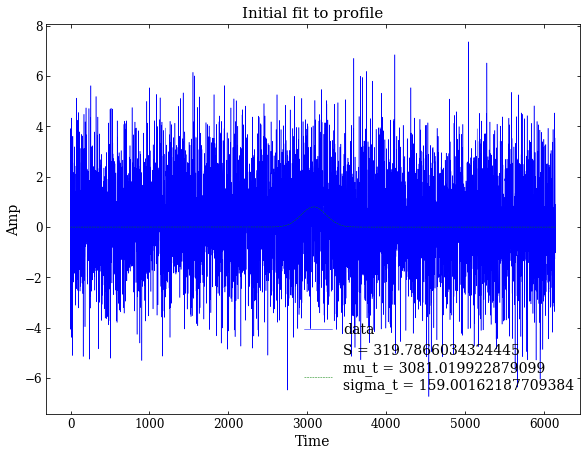

2022-06-09 20:59:45,110 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 20:59:45,113 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f5634e5c1e0>
[-0.655291    0.14766136  0.37670702  1.6065543 ]


2022-06-09 20:59:45,120 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 20:59:45,122 - initial_spectrafit -burstfit.fit - INFO - c0: -0.6552910208702087 +- 0.0
2022-06-09 20:59:45,124 - initial_spectrafit -burstfit.fit - INFO - c1: 0.14766135811805725 +- 0.0
2022-06-09 20:59:45,125 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3767070174217224 +- 0.0


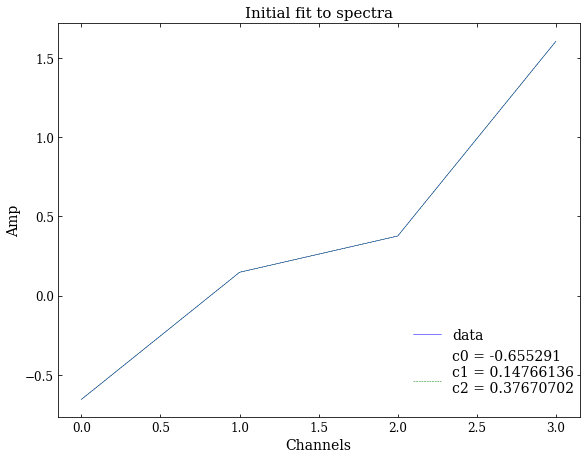

2022-06-09 20:59:45,253 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-09 20:59:45,255 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [-0.655291, 0.14766136, 0.37670702, 319.7866034324445, 3081.019922879099, 159.00162187709384, 151.3]
2022-06-09 20:59:45,693 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 20:59:45,696 - sgram_fit -burstfit.fit - INFO - c0: -18.748097525370525 +- 0.6922966342974849
2022-06-09 20:59:45,698 - sgram_fit -burstfit.fit - INFO - c1: -2.1370466619142188 +- 0.5350678524844953
2022-06-09 20:59:45,700 - sgram_fit -burstfit.fit - INFO - c2: -2.1155497592337187 +- 0.5350574400648683
2022-06-09 20:59:45,703 - sgram_fit -burstfit.fit - INFO - S: 168.67711431049833 +- 1.5422309753034311
2022-06-09 20:59:45,705 - sgram_fit -burstfit.fit - INFO - mu_t: 2760.207477901015 +- 42.43345311914517
2022-06-09 20:59:45,707 - sgram_fit -burstfit.fit - INFO - sigma_t: 3393.1810556472706 +- 33.97619

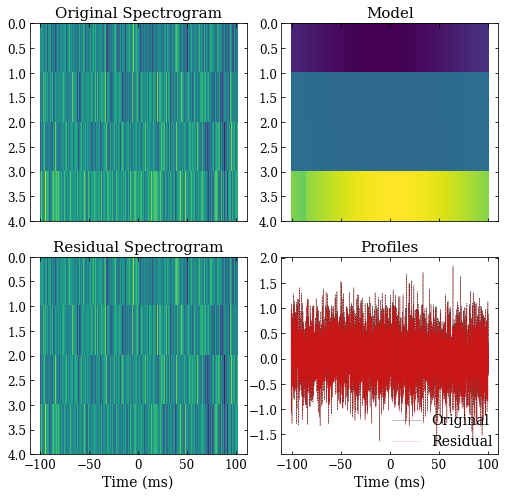

2022-06-09 20:59:46,223 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:46,225 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 20:59:46,229 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 20:59:46,232 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-09 20:59:46,234 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:46,235 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 20:59:46,239 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: --
2022-06-09 20:59:46,241 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-09 20:59:46,242 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-09 20:59:46,244 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-09 20:59:46,260 - initial_profilefit -burstfit.fi

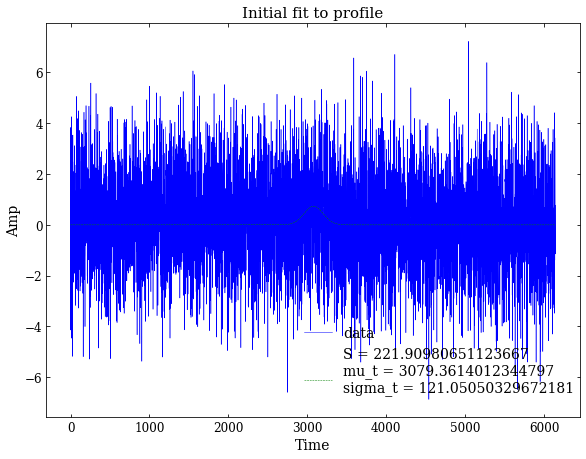

2022-06-09 20:59:46,573 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 20:59:46,576 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f5634e5c1e0>
[0.2286890792433503 0.23905361244793247 0.46652248340204455
 0.3601587290566955]


2022-06-09 20:59:46,579 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 20:59:46,580 - initial_spectrafit -burstfit.fit - INFO - c0: 0.2286890792433503 +- 0.0
2022-06-09 20:59:46,581 - initial_spectrafit -burstfit.fit - INFO - c1: 0.23905361244793247 +- 0.0
2022-06-09 20:59:46,583 - initial_spectrafit -burstfit.fit - INFO - c2: 0.46652248340204455 +- 0.0


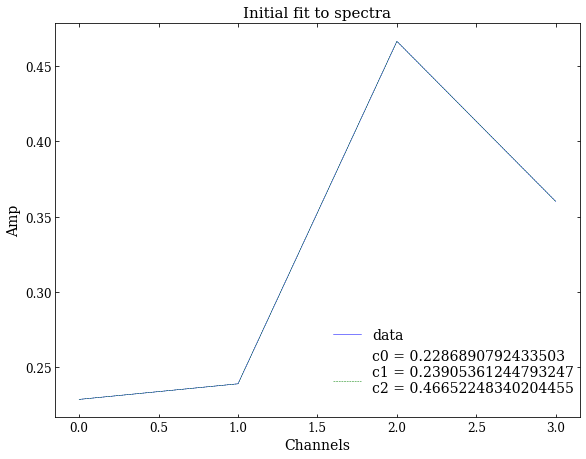

2022-06-09 20:59:46,719 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-09 20:59:46,722 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.2286890792433503, 0.23905361244793247, 0.46652248340204455, 221.90980651123667, 3079.3614012344797, 121.05050329672181, 151.3]
2022-06-09 20:59:46,831 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 20:59:46,834 - sgram_fit -burstfit.fit - INFO - c0: 0.2513854256984065 +- 0.09652589863457375
2022-06-09 20:59:46,835 - sgram_fit -burstfit.fit - INFO - c1: 0.2955616851249627 +- 0.0792332661132993
2022-06-09 20:59:46,836 - sgram_fit -burstfit.fit - INFO - c2: 0.4294791949899385 +- 0.07877249425002864
2022-06-09 20:59:46,838 - sgram_fit -burstfit.fit - INFO - S: 191.24561440174824 +- 12.85788497674079
2022-06-09 20:59:46,839 - sgram_fit -burstfit.fit - INFO - mu_t: 3148.3285938477547 +- 51.38598251977669
2022-06-09 20:59:46,840 - sgram_fit -burstfit.fit - INFO - sigma_t: 11

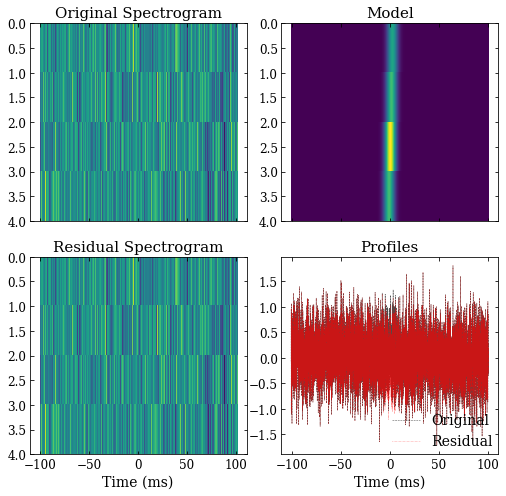

2022-06-09 20:59:47,491 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:47,495 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 20:59:47,502 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 20:59:47,503 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-09 20:59:47,505 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:47,506 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 20:59:47,512 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: --
2022-06-09 20:59:47,513 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-09 20:59:47,514 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-09 20:59:47,516 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-06-09 20:59:47,5

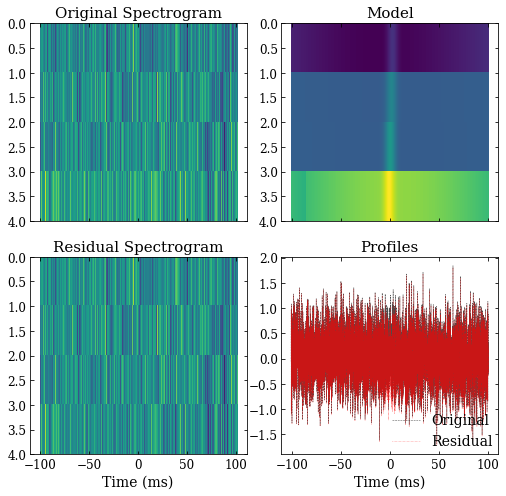

2022-06-09 20:59:48,185 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:48,188 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 20:59:48,195 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 20:59:48,198 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-09 20:59:48,202 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:48,205 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 20:59:48,212 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: --
2022-06-09 20:59:48,213 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 20:59:48,215 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 20:59:48,222 - tests -root - INFO - P values: T-test (0.65622), Kruskal (0.79380), KS (0.77281), F-test (0.78315)
2022-06-09 20:59:48,224 - run_t

{bf}.calc_redchisq()= --


In [5]:
bf_S1T1_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 2000, 0),(np.inf, 4000, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)

### with scattering

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-09 20:59:48,273 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 20:59:48,274 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 20:59:48,278 - tests -root - INFO - P values: T-test (0.65622), Kruskal (0.79380), KS (0.77281), F-test (0.78315)
2022-06-09 20:59:48,280 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-09 20:59:48,284 - tests -root - INFO - P values: T-test (0.02551), Kruskal (0.03020), KS (0.04676), F-test (0.96424)
2022-06-09 20:59:48,285 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-09 20:59:48,289 - tests -root - INFO - P values: T-test (0.00577), Kruskal (0.01037), KS (0.07482), F-test (0.84630)
2022-06-09 20:59:48,291 - run_tests -burstfit.fit - INFO - On pulse residual is similar to right off pulse region.
2022-06-09 20:59:48,293 - fitall -burstfit.fit - WARNING - On pulse region looks like noise. Check candidate parameters


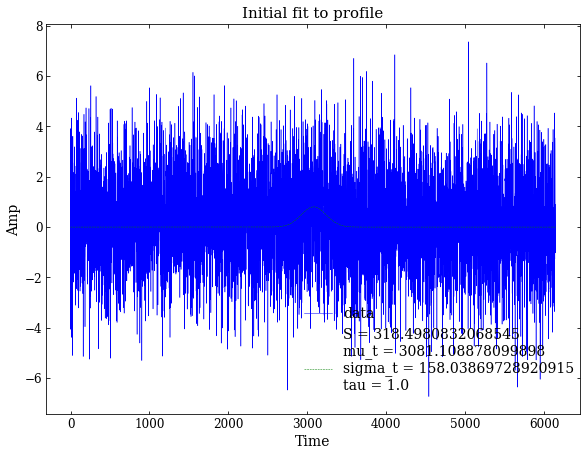

2022-06-09 20:59:48,622 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 20:59:48,625 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f5634e5c1e0>
[-0.65182644  0.13813838  0.37736398  1.6208217 ]


2022-06-09 20:59:48,631 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 20:59:48,633 - initial_spectrafit -burstfit.fit - INFO - c0: -0.6518264412879944 +- 0.0
2022-06-09 20:59:48,635 - initial_spectrafit -burstfit.fit - INFO - c1: 0.13813838362693787 +- 0.0
2022-06-09 20:59:48,636 - initial_spectrafit -burstfit.fit - INFO - c2: 0.37736397981643677 +- 0.0


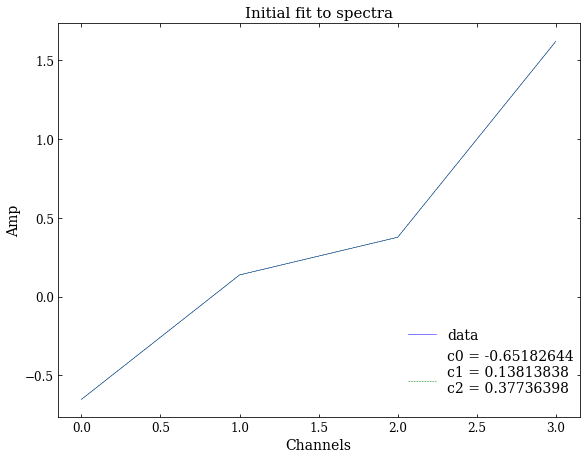

2022-06-09 20:59:48,773 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-09 20:59:48,776 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [-0.65182644, 0.13813838, 0.37736398, 318.4980832068545, 3081.108878099898, 158.03869728920915, 1.0, 151.3]
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
2022-06-09 20:59:49,179 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-09 20:59:51,157 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 20:59:51,160 - sgram_fit -burstfit.fit - INFO - c0: -0.58563032687222 +- 0.08489355595256289
2022-06-09 20:59:51,162 - sgram_fit -burstfit.fit - INFO - c1: 0.16576602008109262 +- 0.06666888395425662
2022-06-09 20:59:51,164 - sgram_fit -burstfit.fit - INFO - c2: 0.3523132497753738 +- 0.0

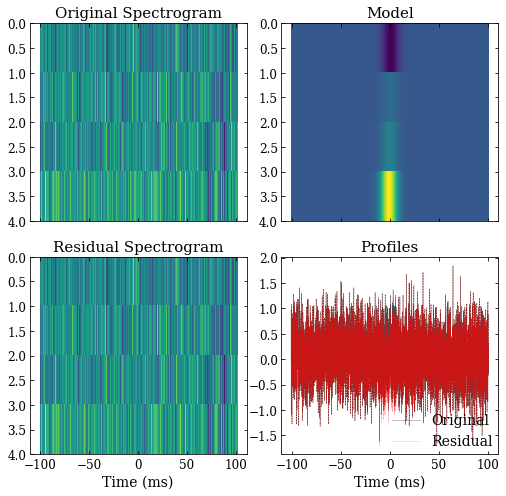

2022-06-09 20:59:51,751 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:51,753 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 20:59:51,755 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 20:59:51,756 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-09 20:59:51,758 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:51,759 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 20:59:51,762 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9997965912378171
2022-06-09 20:59:51,763 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-09 20:59:51,765 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-09 20:59:51,769 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 0.9997965912378171


In [6]:
bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 2000, 0, 0),(np.inf, 4000, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-09 20:59:51,803 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 20:59:51,804 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 20:59:51,809 - tests -root - INFO - P values: T-test (0.65622), Kruskal (0.79380), KS (0.77281), F-test (0.78315)
2022-06-09 20:59:51,811 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-09 20:59:51,815 - tests -root - INFO - P values: T-test (0.02551), Kruskal (0.03020), KS (0.04676), F-test (0.96424)
2022-06-09 20:59:51,816 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-09 20:59:51,820 - tests -root - INFO - P values: T-test (0.00577), Kruskal (0.01037), KS (0.07482), F-test (0.84630)
2022-06-09 20:59:51,822 - run_tests -burstfit.fit - INFO - On pulse residual is similar to right off pulse region.
2022-06-09 20:59:51,824 - fitall -burstfit.fit - WARNING - On pulse region looks like noise. Check candidate parameters


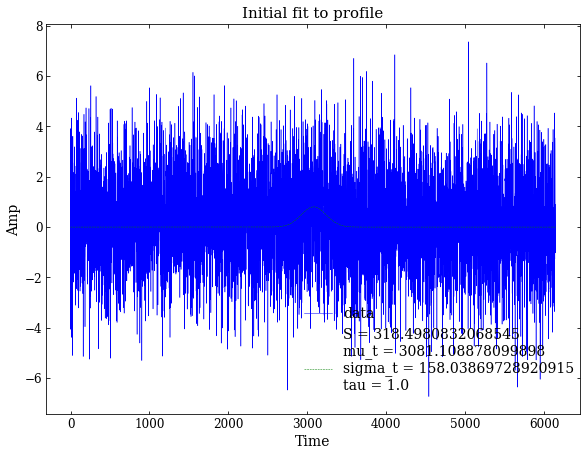

2022-06-09 20:59:52,177 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 20:59:52,179 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f5634e5c1e0>
[-0.65182644  0.13813838  0.37736398  1.6208217 ]


2022-06-09 20:59:52,186 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 20:59:52,188 - initial_spectrafit -burstfit.fit - INFO - c0: -0.6518264412879944 +- 0.0
2022-06-09 20:59:52,190 - initial_spectrafit -burstfit.fit - INFO - c1: 0.13813838362693787 +- 0.0
2022-06-09 20:59:52,192 - initial_spectrafit -burstfit.fit - INFO - c2: 0.37736397981643677 +- 0.0


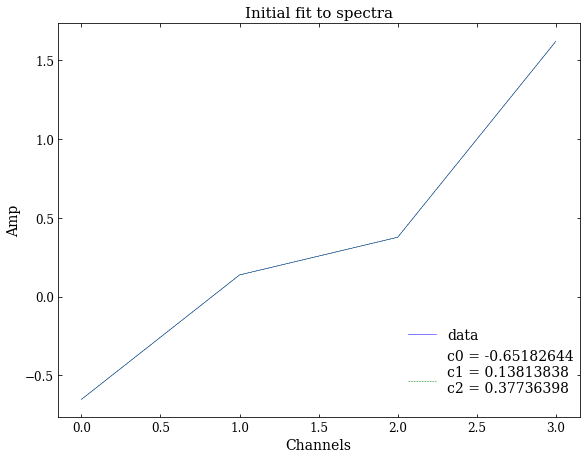

2022-06-09 20:59:52,325 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-09 20:59:52,326 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [-0.65182644, 0.13813838, 0.37736398, 318.4980832068545, 3081.108878099898, 158.03869728920915, 1.0, 151.3]
2022-06-09 20:59:52,724 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-09 20:59:54,907 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 20:59:54,914 - sgram_fit -burstfit.fit - INFO - c0: -0.58563032687222 +- 0.08489355595256289
2022-06-09 20:59:54,915 - sgram_fit -burstfit.fit - INFO - c1: 0.16576602008109262 +- 0.06666888395425662
2022-06-09 20:59:54,917 - sgram_fit -burstfit.fit - INFO - c2: 0.3523132497753738 +- 0.06626979582945704
2022-06-09 20:59:54,919 - sgram_fit -burstfit.fit - INFO - S: 299.2403066222236 +- 13.296743714481002
2022-06-09 20:59:54,921 - sgram_fit -burstfit.fit - INFO - mu_t: 3094.

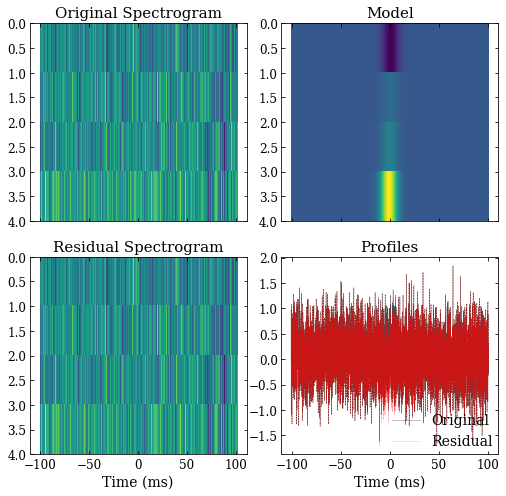

2022-06-09 20:59:55,638 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:55,640 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 20:59:55,643 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 20:59:55,645 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-09 20:59:55,647 - model -burstfit.fit - INFO - Making model.
2022-06-09 20:59:55,649 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 20:59:55,658 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9997965912378171
2022-06-09 20:59:55,660 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-09 20:59:55,661 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-09 20:59:55,663 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-09 20:59:55,817 - initial_profile

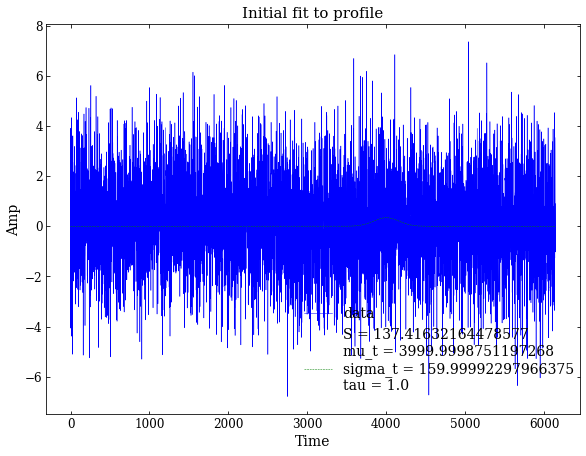

2022-06-09 20:59:56,207 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 20:59:56,210 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f5634e5c1e0>
[-1.6767178784654988 0.11725129166158949 0.09593413839723158
 3.250347018347856]


2022-06-09 20:59:56,215 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 20:59:56,216 - initial_spectrafit -burstfit.fit - INFO - c0: -1.6767178784654988 +- 0.0
2022-06-09 20:59:56,219 - initial_spectrafit -burstfit.fit - INFO - c1: 0.11725129166158949 +- 0.0
2022-06-09 20:59:56,220 - initial_spectrafit -burstfit.fit - INFO - c2: 0.09593413839723158 +- 0.0


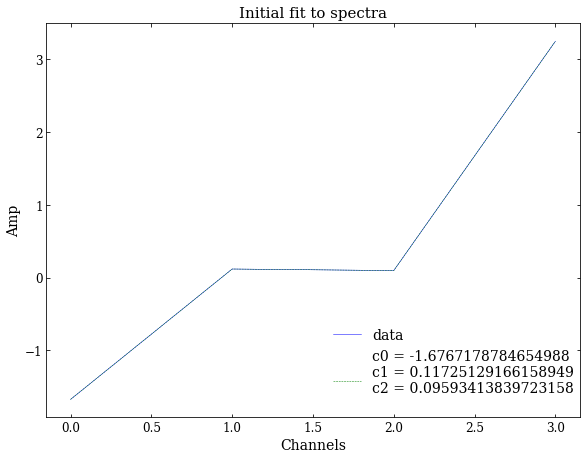

2022-06-09 20:59:56,494 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-09 20:59:56,497 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [-1.6767178784654988, 0.11725129166158949, 0.09593413839723158, 137.41632164478577, 3999.9998751197268, 159.99992297966375, 1.0, 151.3]
2022-06-09 20:59:57,459 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-09 21:00:02,788 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 21:00:02,791 - sgram_fit -burstfit.fit - INFO - c0: -1.5257043465352704 +- 0.1956920010011827
2022-06-09 21:00:02,793 - sgram_fit -burstfit.fit - INFO - c1: 0.14070154999390735 +- 0.15414196416409623
2022-06-09 21:00:02,795 - sgram_fit -burstfit.fit - INFO - c2: 0.11512096607667788 +- 0.154183587529217
2022-06-09 21:00:02,797 - sgram_fit -burstfit.fit - INFO - S: 128.87968832612123 +- 5.4707771029967835
2022-06-09 21:00:02,798 - sgram_fit -burs

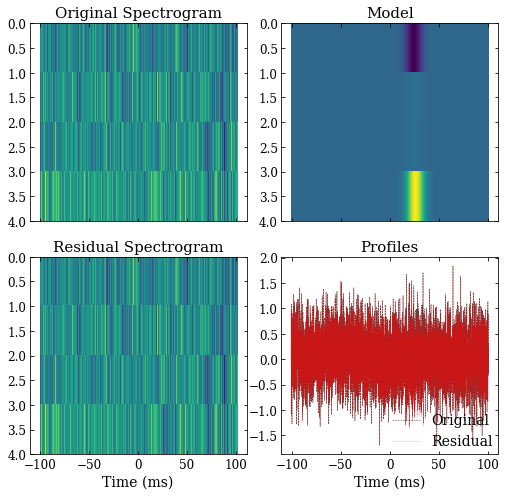

2022-06-09 21:00:03,427 - model -burstfit.fit - INFO - Making model.
2022-06-09 21:00:03,430 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 21:00:03,435 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 21:00:03,437 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-09 21:00:03,440 - model -burstfit.fit - INFO - Making model.
2022-06-09 21:00:03,442 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 21:00:03,455 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9881828237771202
2022-06-09 21:00:03,458 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-09 21:00:03,461 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-09 21:00:03,463 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

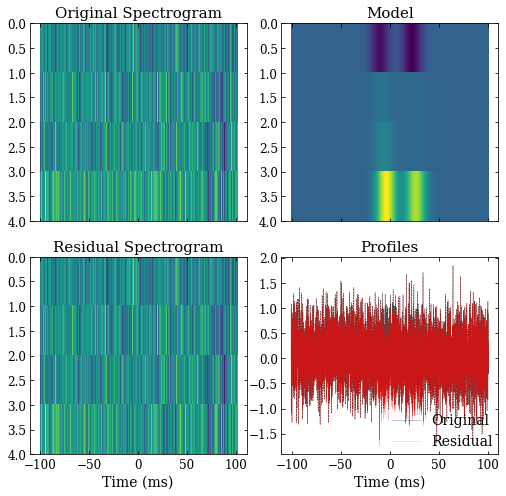

2022-06-09 21:00:17,558 - model -burstfit.fit - INFO - Making model.
2022-06-09 21:00:17,560 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 21:00:17,564 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 21:00:17,567 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-09 21:00:17,569 - model -burstfit.fit - INFO - Making model.
2022-06-09 21:00:17,570 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 21:00:17,576 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9793959350086545
2022-06-09 21:00:17,578 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 21:00:17,581 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 21:00:17,587 - tests -root - INFO - P values: T-test (0.65622), Kruskal (0.79380), KS (0.77281), F-test (0.78315)
2022-06-09 21:0

{bf}.calc_redchisq()= 0.9793959350086545


In [7]:
bf_S1T2_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 2000, 0, 0),(np.inf, 4000, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)


### Run MCMC after checking all curvfit results

2022-06-09 21:00:17,668 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-09 21:00:17,671 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [-1.87480975e+01 -2.13704666e+00 -2.11554976e+00  1.68677114e+02
  2.76020748e+03  3.39318106e+03  1.88931653e+02]
2022-06-09 21:00:17,682 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-09 21:00:17,685 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-09 21:00:17,687 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-09 21:00:17,709 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-09 21:00:17,711 - run_mcmc -burstfit.mcmc - INFO - Priors used in MCMC are:
2022-06-09 21:00:17,714 - run_mcmc

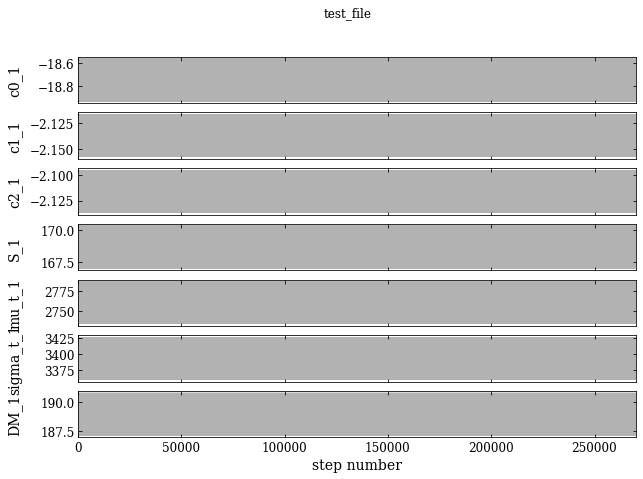

<Figure size 432x288 with 0 Axes>

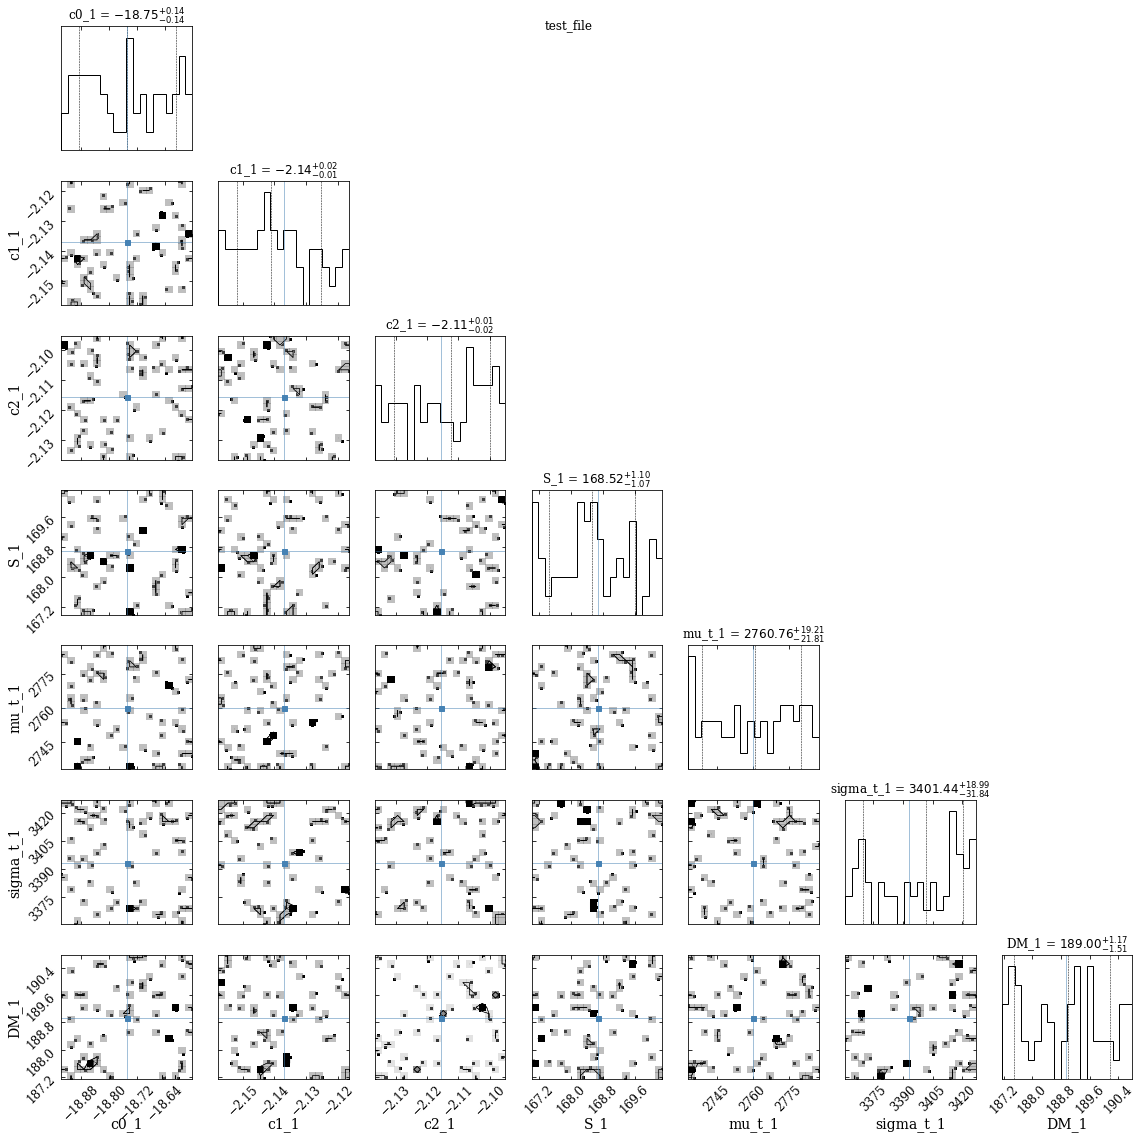

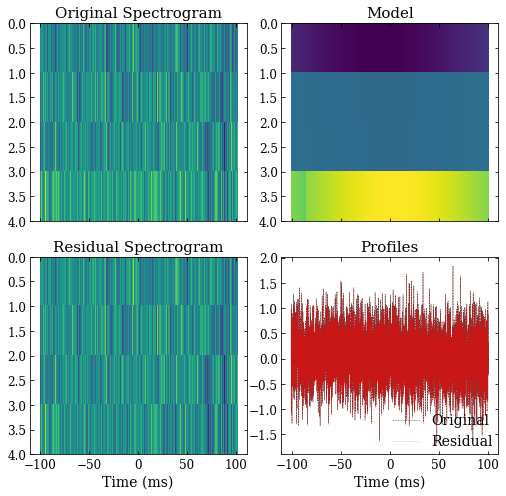

{bf}.bic =  22406.430374692565


0

In [8]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c1, mcmc=True)

2022-06-09 21:15:25,837 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-09 21:15:25,839 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [-1.87480975e+01 -2.13704666e+00 -2.11554976e+00  1.68677114e+02
  2.76020748e+03  3.39318106e+03  1.88931653e+02  2.51385426e-01
  2.95561685e-01  4.29479195e-01  1.91245614e+02  3.14832859e+03
  1.19226647e+02  1.42914256e+02]
2022-06-09 21:15:25,842 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-09 21:15:25,844 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-09 21:15:25,845 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-09 21:15:25,855 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022

2022-06-09 21:20:43,602 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:43,658 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:43,717 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:43,777 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:43,881 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:43,967 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:44,052 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:44,131 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:44,200 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:44,259 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:20:44,317 - hist2d -root - WARNING - Too few points to create valid contours

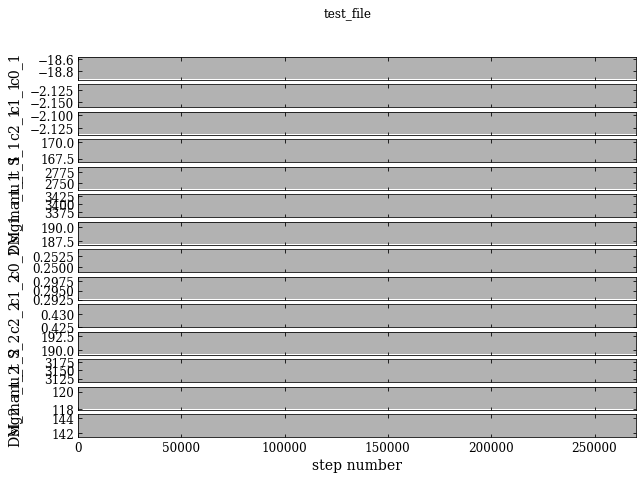

<Figure size 432x288 with 0 Axes>

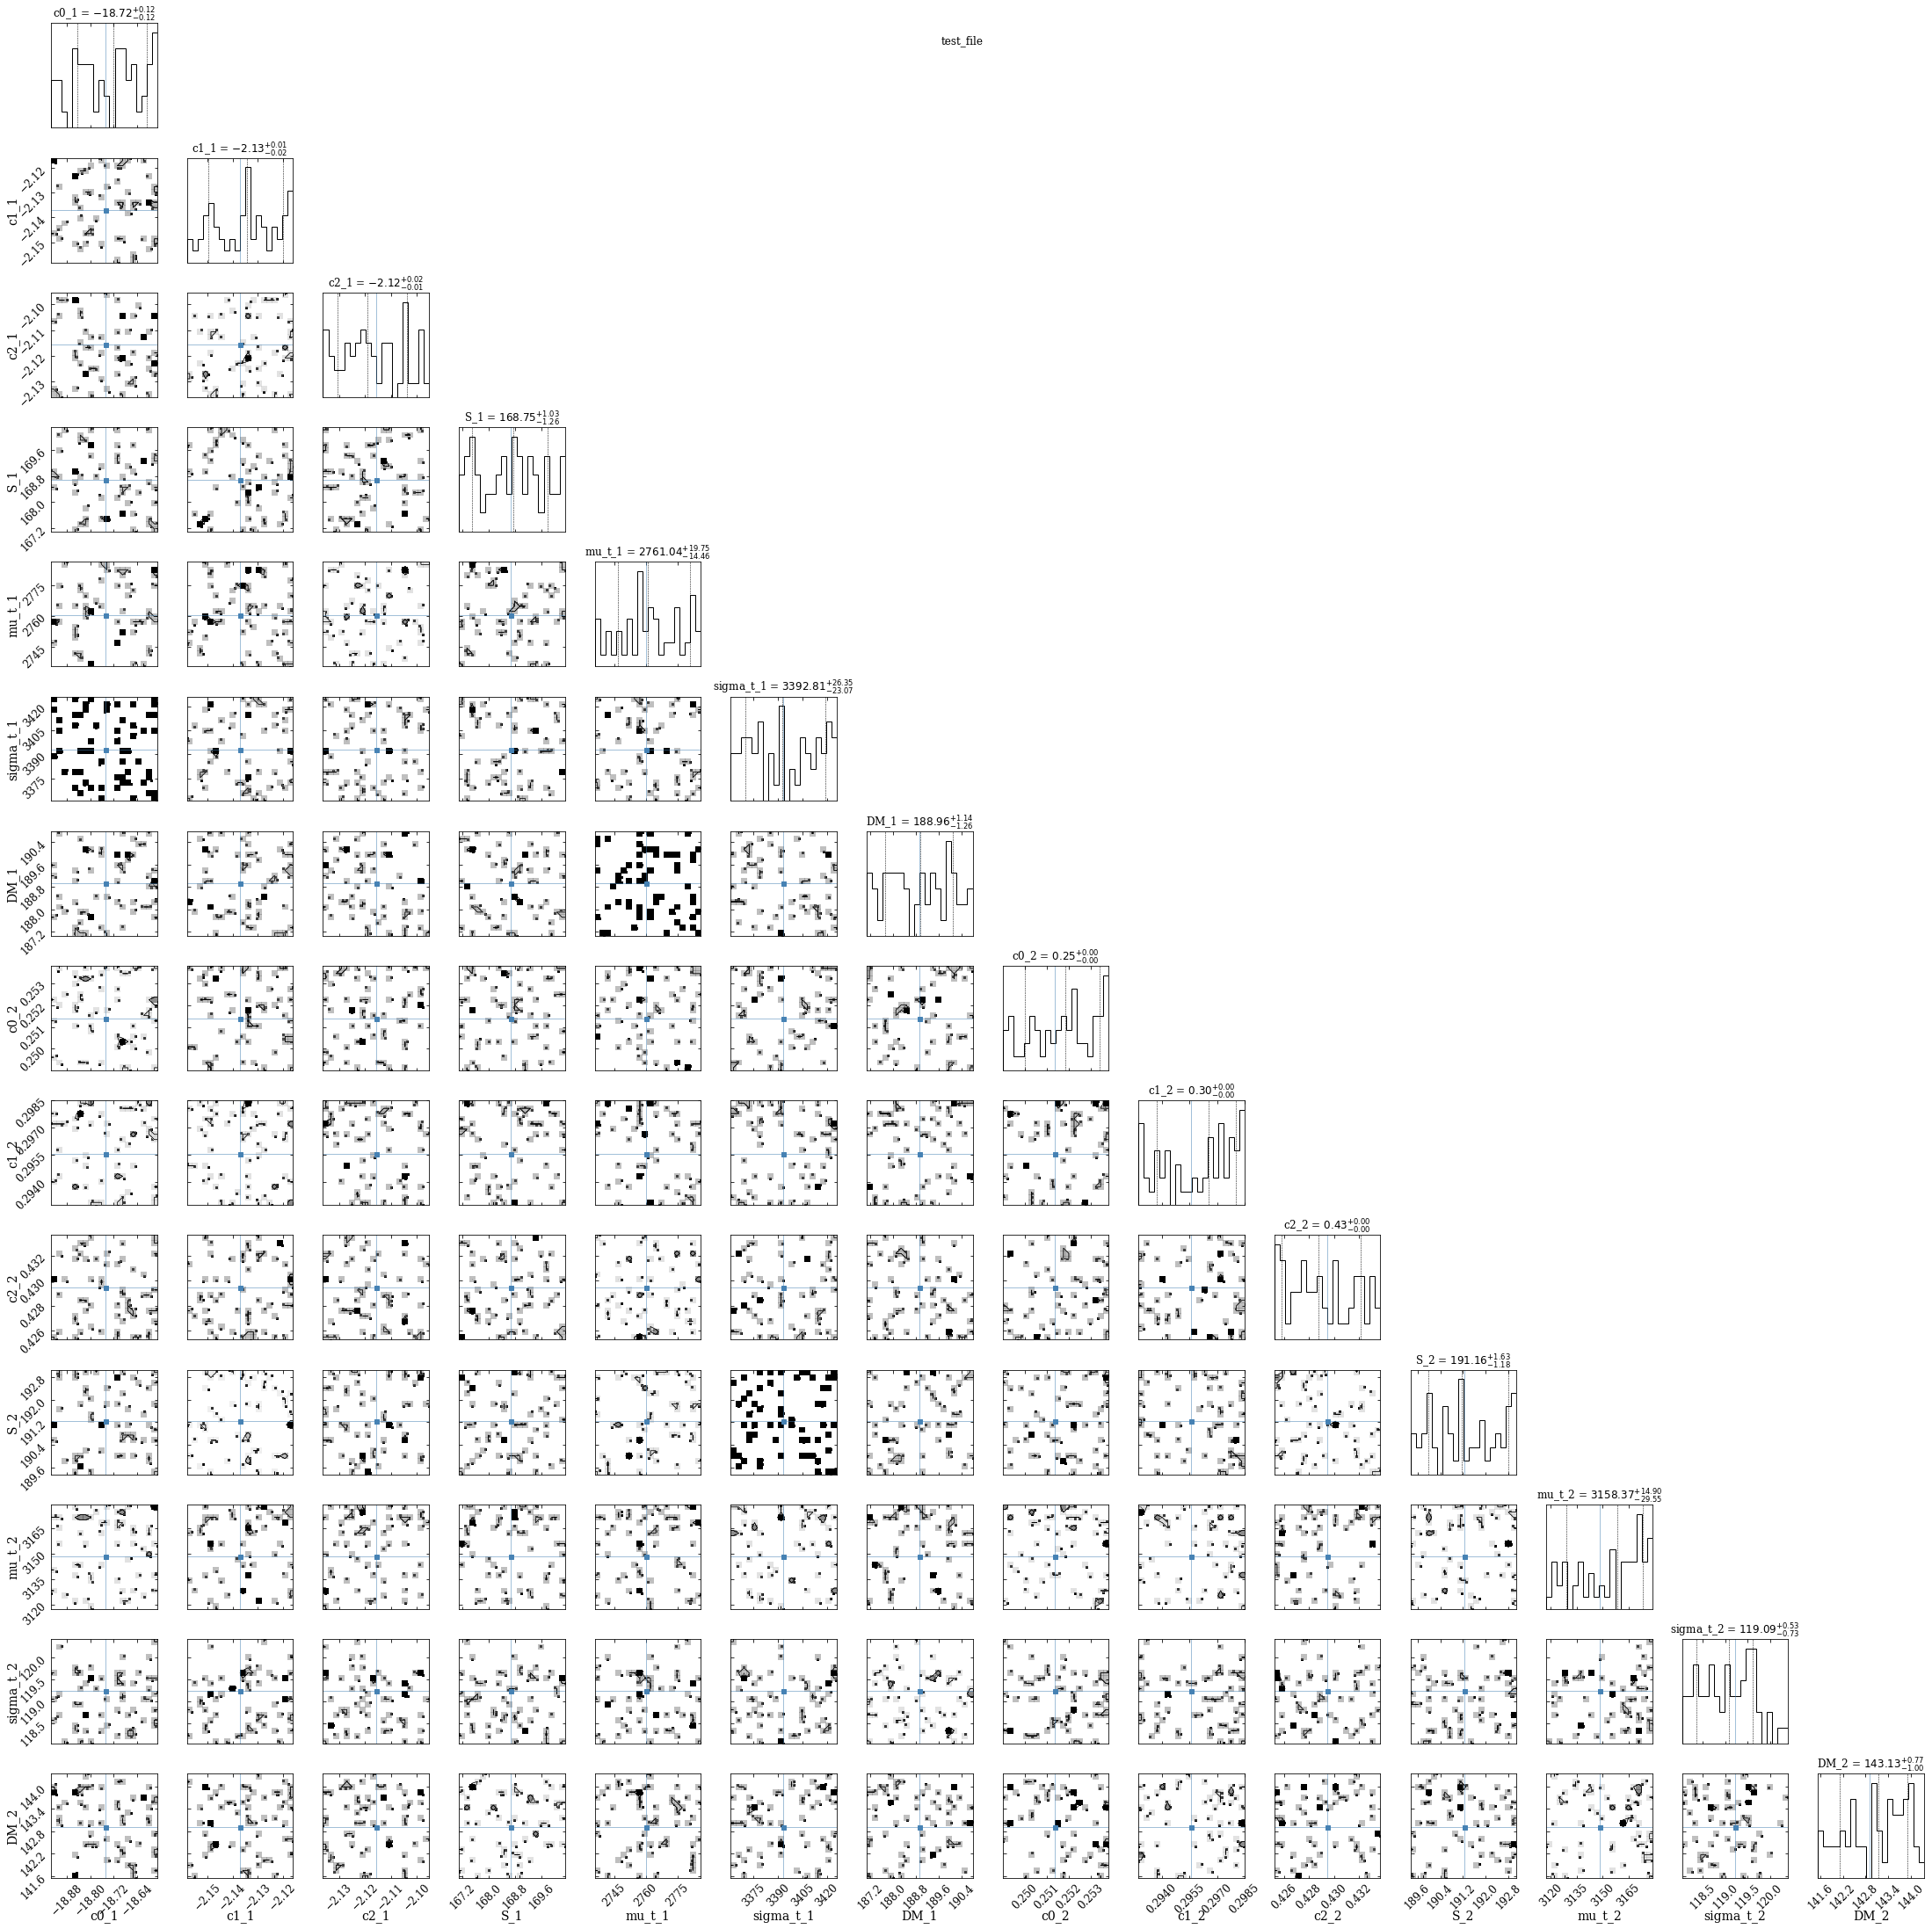

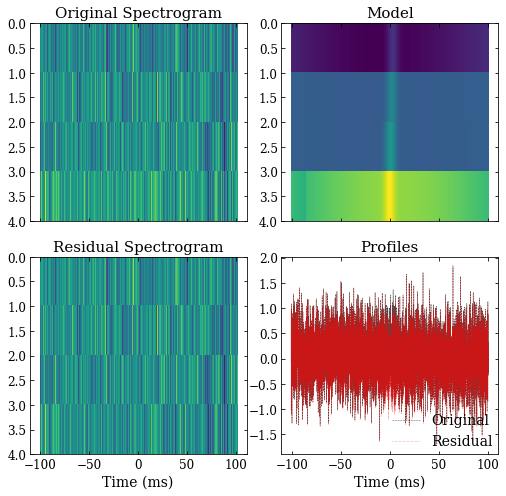

{bf}.bic =  22446.185451777805


0

In [11]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c2, mcmc=True)

2022-06-09 21:21:58,929 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-09 21:21:58,932 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [-5.85630327e-01  1.65766020e-01  3.52313250e-01  2.99240307e+02
  3.09447088e+03  1.89646437e+02  1.00000000e+00  1.46692891e+02]
2022-06-09 21:21:58,935 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-09 21:21:58,937 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-09 21:21:58,939 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-09 21:21:58,941 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(1.8) + max_sigma_t_prior(341.3635861413292))
2022-06-09 21:21:58,943 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sig

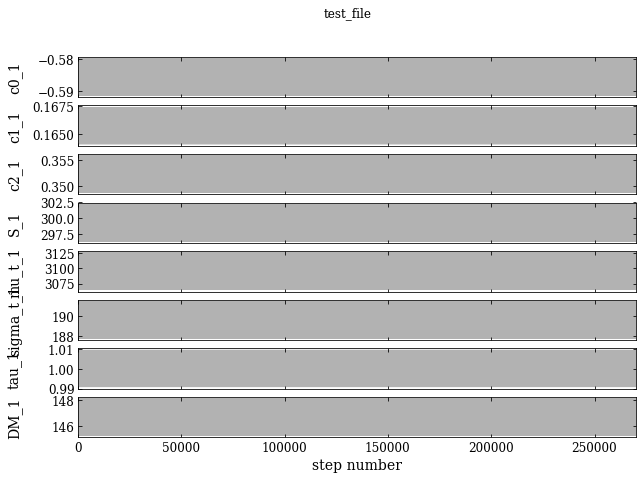

<Figure size 432x288 with 0 Axes>

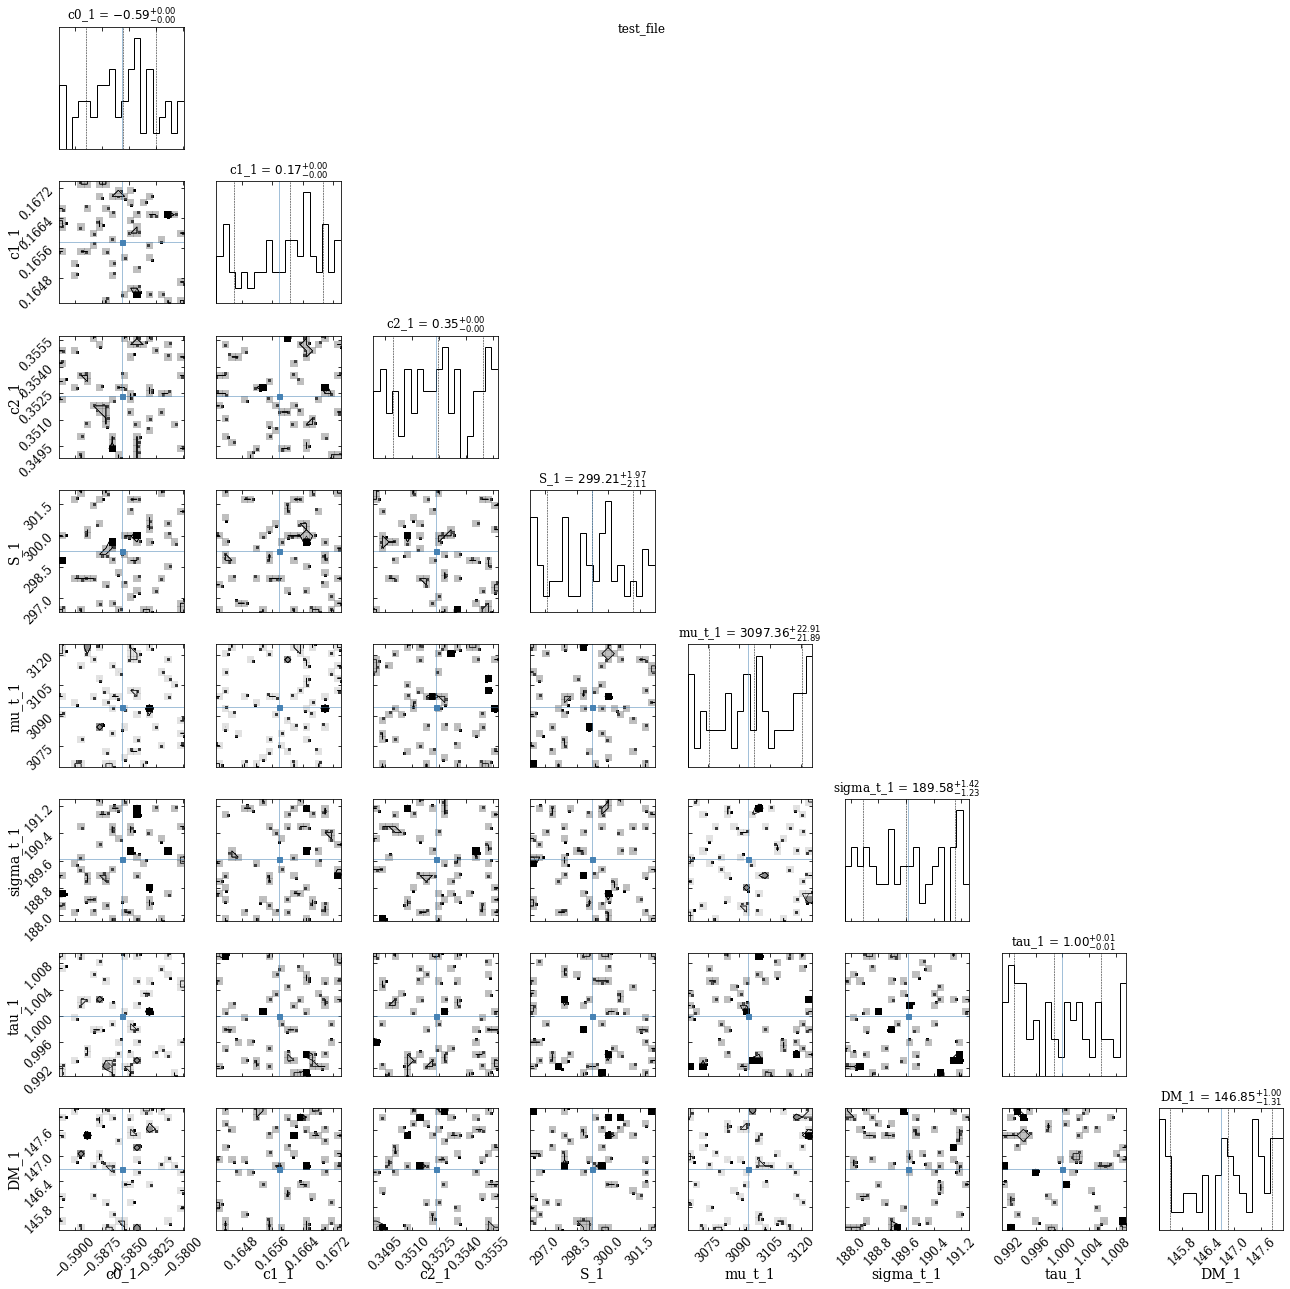

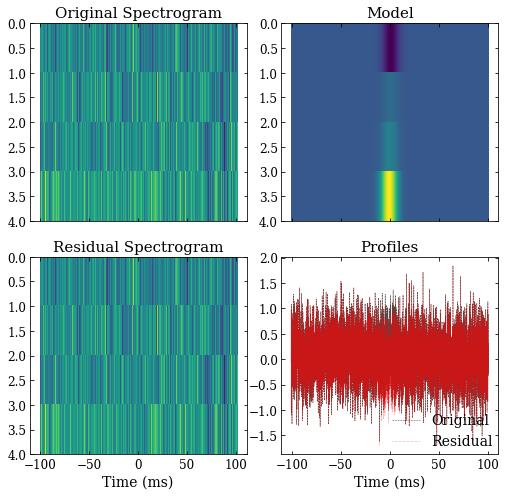

{bf}.bic =  24389.759687647722


0

In [12]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c1, mcmc=True)

2022-06-09 21:27:11,520 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-09 21:27:11,532 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [-7.02756392e-01  1.72418646e-01  3.25047276e-01  3.09256283e+02
  2.76072175e+03  2.27573713e+02  1.16942044e+00  1.67580415e+02
 -1.82282502e+00  1.68841798e-01  1.38145135e-01  1.37731149e+02
  3.75843579e+03  2.30381912e+02  1.00000000e+00  1.60588162e+02]
2022-06-09 21:27:11,536 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-09 21:27:11,538 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-09 21:27:11,540 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-09 21:27:11,542 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(2.1049567965423597) + max_sigma_t_prior(414.6874409026472))
2022-

2022-06-09 21:32:50,132 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,191 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,248 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,308 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,401 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,466 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,542 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,624 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,708 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,790 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:50,871 - hist2d -root - WARNING - Too few points to create valid contours

2022-06-09 21:32:56,940 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:56,997 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:57,056 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:57,114 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:57,175 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:32:57,236 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-09 21:33:41,667 - make_autocorr_plot -burstfit.mcmc - WARNING - Not enough valid autocorrelation values to plot. Not making autocorrelation plot.


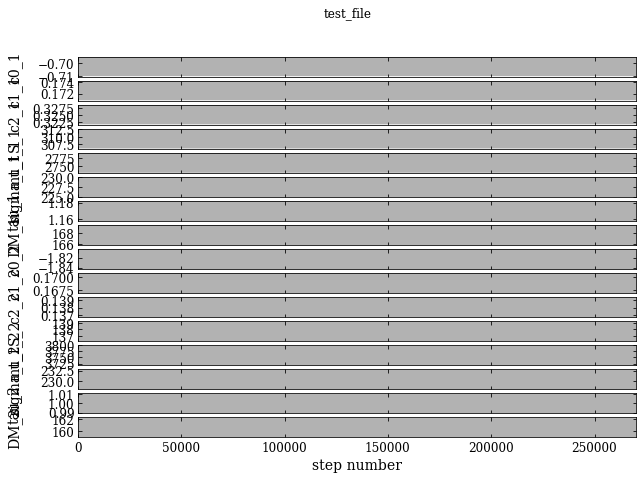

<Figure size 432x288 with 0 Axes>

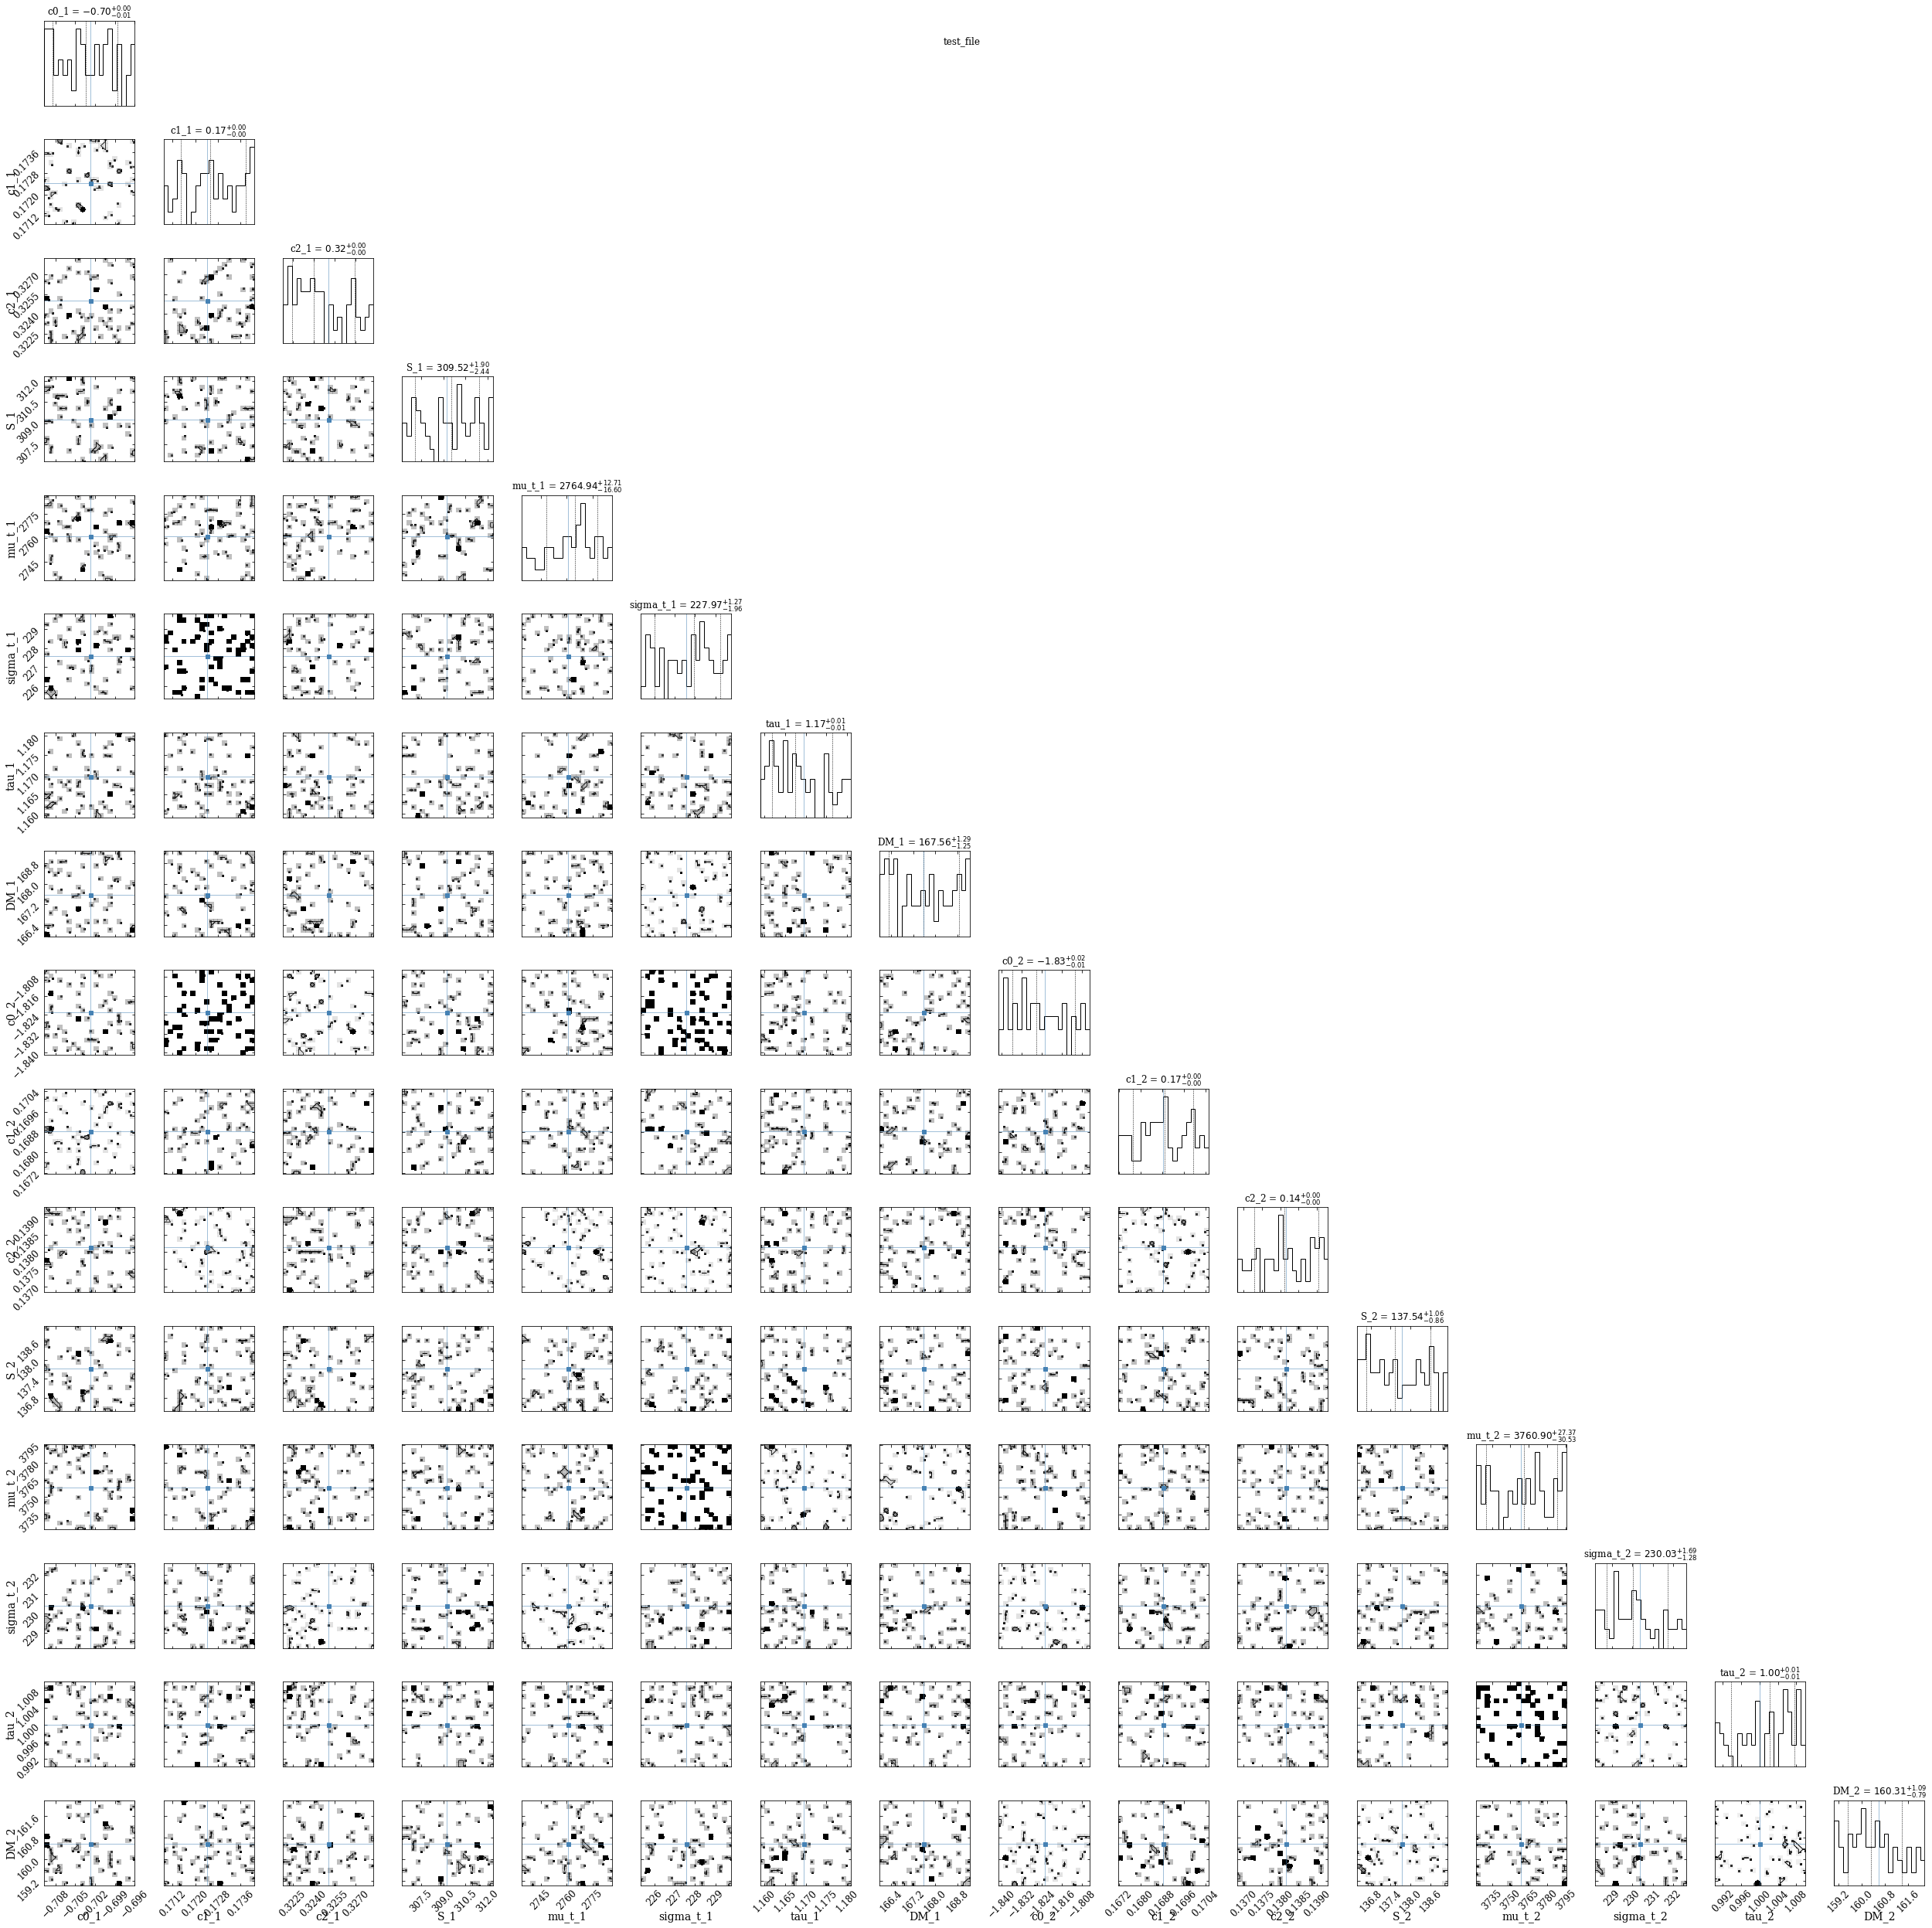

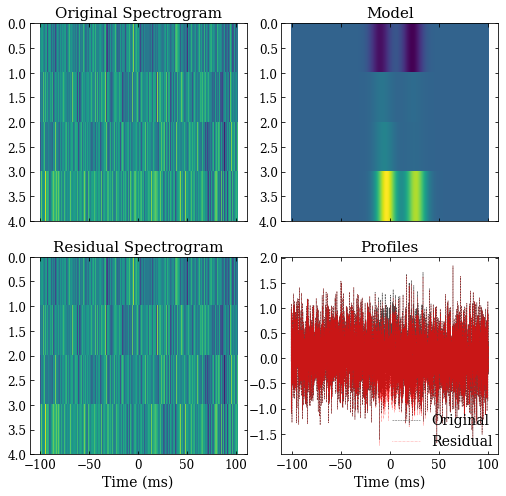

{bf}.bic =  24084.377767767775


0

In [13]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c2, mcmc=True)

### select model and save results 

In [15]:
def select_model(bf_name_list):
    bf_with_bic_list = []
    bic_list = []
    
    for name in bf_name_list:

        if name in globals() or name in locals():
            bf = globals()[name]

            if bf.bic is None: 
                print("%s.bic not found"%name)

            else:         
                bf_with_bic_list = np.append(bf_with_bic_list, name)
                bic_list = np.append(bic_list, bf.bic)
        
        else:
            print("%s not used"%name)

    sorted_bf = ([x for _,x in sorted(zip(bic_list, bf_with_bic_list))])  
    sorted_bic = sorted(bic_list)

    print(sorted_bf) 
    print(sorted_bic)
    
    return sorted_bf, sorted_bic


def save_results(file, candidate, bf_name):
    bf_best = globals()[bf_name]
    with open(file, "a") as f:
        print(candidate, file=f)
        print(bf_name, file=f)
        for ncomp in range(bf_best.ncomponents):
            for i in range(len(bf_best.param_names)):
                print("${:.4}^{{+{:.2}}}_{{-{:.2}}}$".format(bf_best.mcmc_params[ncomp + 1]['popt'][i], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][0], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][1]),
                     file=f) 
                
        print("\n", file = f)
    
    return 0



# sorted_bf, sorted_bic = paper_fit.select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])
# paper_fit.save_results(file, candidate, bf_name)

sorted_bf, sorted_bic = select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])

file = "paper_fit_result.txt"
bf_name = sorted_bf[0]
save_results(file, candidate, bf_name)

bf_S1T1_c3 not used
bf_S1T2_c3 not used
['bf_S1T1_c1', 'bf_S1T1_c2', 'bf_S1T2_c2', 'bf_S1T2_c1']
[22406.430374692565, 22446.185451777805, 24084.377767767775, 24389.759687647722]
